In [ ]:
!unzip /content/drive/MyDrive/aa.zip

Archive:  /content/drive/MyDrive/aa.zip
   creating: covid_image_data/
  inflating: covid_image_data/sample_submission.csv  
   creating: covid_image_data/test/
  inflating: covid_image_data/test/Image_1.jpg  
  inflating: covid_image_data/test/Image_10.jpg  
  inflating: covid_image_data/test/Image_100.jpg  
  inflating: covid_image_data/test/Image_101.jpg  
  inflating: covid_image_data/test/Image_102.jpg  
  inflating: covid_image_data/test/Image_103.jpg  
  inflating: covid_image_data/test/Image_104.jpg  
  inflating: covid_image_data/test/Image_105.jpg  
  inflating: covid_image_data/test/Image_106.jpg  
  inflating: covid_image_data/test/Image_107.jpg  
  inflating: covid_image_data/test/Image_108.jpg  
  inflating: covid_image_data/test/Image_109.jpg  
  inflating: covid_image_data/test/Image_11.jpg  
  inflating: covid_image_data/test/Image_110.jpg  
  inflating: covid_image_data/test/Image_111.jpg  
  inflating: covid_image_data/test/Image_112.jpg  
  inflating: covid_image_da

In [85]:
import pandas as pd
import numpy as np
import os, shutil
from fastai.vision import *
from fastai.widgets import ClassConfusion
import cv2
from PIL import Image
import imutils
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [56]:
df = pd.read_csv('/content/covid_image_data/Training_set_covid.csv')
df.head()

,filename,label
0,Image_1.jpg,1
1,Image_2.jpg,0
2,Image_3.jpg,0
3,Image_4.jpg,0
4,Image_5.jpg,0


In [57]:
len(df)

3479

In [58]:
df.label.value_counts()

0    3073
1     406
Name: label, dtype: int64

In [59]:
df.label[0]

1

In [60]:
 covid = []
 a = 0
 for x in range(0,len(df)):
   if df.label[x] == 1:
     covid.append(df.filename[x])
     a+=1

print(a)

406


In [61]:
covid[:10]

['Image_1.jpg',
 'Image_12.jpg',
 'Image_15.jpg',
 'Image_24.jpg',
 'Image_36.jpg',
 'Image_39.jpg',
 'Image_50.jpg',
 'Image_53.jpg',
 'Image_54.jpg',
 'Image_60.jpg']

In [62]:
non_covid = []
b=0
for x in range(0,len(df)):
  if df.label[x]==0:
    non_covid.append(df.filename[x])
    b+=1
print(b)
print(non_covid[:10])

3073
['Image_2.jpg', 'Image_3.jpg', 'Image_4.jpg', 'Image_5.jpg', 'Image_6.jpg', 'Image_7.jpg', 'Image_8.jpg', 'Image_9.jpg', 'Image_10.jpg', 'Image_11.jpg']


In [63]:
image_path = '/content/covid_image_data/train'
covid_image_path = [os.path.join(image_path,x) for x in covid]

In [64]:
non_covid_image_path = [os.path.join(image_path,x) for x in non_covid]

In [65]:
len(non_covid_image_path)

3073

In [66]:
covid_image_path

['/content/covid_image_data/train/Image_1.jpg',
 '/content/covid_image_data/train/Image_12.jpg',
 '/content/covid_image_data/train/Image_15.jpg',
 '/content/covid_image_data/train/Image_24.jpg',
 '/content/covid_image_data/train/Image_36.jpg',
 '/content/covid_image_data/train/Image_39.jpg',
 '/content/covid_image_data/train/Image_50.jpg',
 '/content/covid_image_data/train/Image_53.jpg',
 '/content/covid_image_data/train/Image_54.jpg',
 '/content/covid_image_data/train/Image_60.jpg',
 '/content/covid_image_data/train/Image_67.jpg',
 '/content/covid_image_data/train/Image_71.jpg',
 '/content/covid_image_data/train/Image_80.jpg',
 '/content/covid_image_data/train/Image_83.jpg',
 '/content/covid_image_data/train/Image_94.jpg',
 '/content/covid_image_data/train/Image_95.jpg',
 '/content/covid_image_data/train/Image_99.jpg',
 '/content/covid_image_data/train/Image_106.jpg',
 '/content/covid_image_data/train/Image_112.jpg',
 '/content/covid_image_data/train/Image_120.jpg',
 '/content/covid_i

In [71]:
import shutil 
import os 

for filename in covid_image_path :
       src_dir = filename
       dst_dir = "/content/data/covid"
       shutil.move(src_dir,dst_dir)

In [73]:
for filename in non_covid_image_path :
       src_dir = filename
       dst_dir = "/content/data/non-covid"
       shutil.move(src_dir,dst_dir)

In [72]:
len(os.listdir('/content/data/covid'))

406

In [74]:
len(os.listdir('/content/data/non-covid'))

3073

In [76]:
path, dirs, files2 = os.walk("data/non-covid").__next__()
path, dirs, files1 = os.walk("data/covid").__next__()
print("Number of images in non_covid: {}".format(len(files2)),"Number of images in Covid: {}".format(len(files1)) )

Number of images in non_covid: 3073 Number of images in Covid: 406


In [78]:
classes=['covid','non-covid']
import warnings
warnings.filterwarnings('ignore')

In [79]:
data = ImageDataBunch.from_folder('data', train=".", valid_pct=0.20,
        ds_tfms=get_transforms(), bs=8, size=512, num_workers=4).normalize(imagenet_stats)

In [80]:
data.classes

['covid', 'non-covid']

In [81]:
print(len(data.train_ds),len(data.valid_ds))

2784 695


In [95]:
type(data.train_ds)

fastai.data_block.LabelList

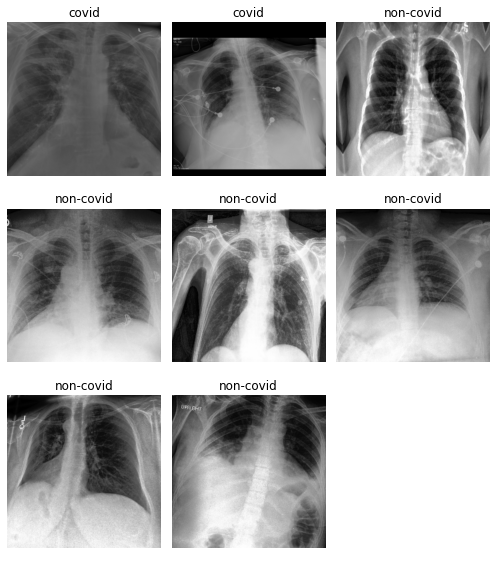

In [89]:
data.show_batch(rows=10, figsize=(7,8))

In [87]:
%matplotlib inline

In [96]:
precision=Precision()
recall=Recall()
AUC=AUROC()

In [101]:
learn = cnn_learner(data, models.resnet50, metrics=(accuracy,precision,recall,AUC),callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,precision,recall,auroc,time
0,0.591848,0.254506,0.929496,0.952381,0.969305,0.850162,02:49
1,0.299001,0.220045,0.919424,0.946117,0.964459,0.948899,02:46
2,0.322683,0.138033,0.953957,0.962205,0.987076,0.967690,02:44
3,0.222929,0.147793,0.945324,0.944870,0.996769,0.983526,02:45
4,0.176226,0.268441,0.910791,0.910162,0.998384,0.975916,02:44
5,0.117847,0.130893,0.938129,0.944444,0.988691,0.982463,02:43
6,0.128215,0.158328,0.932374,0.944099,0.982229,0.978382,02:46
7,0.067150,0.124914,0.945324,0.956044,0.983845,0.984398,02:47
8,0.104622,0.160549,0.939568,0.941807,0.993538,0.984759,02:49
9,0.092746,0.152244,0.943885,0.946154,0.993538,0.985120,02:47


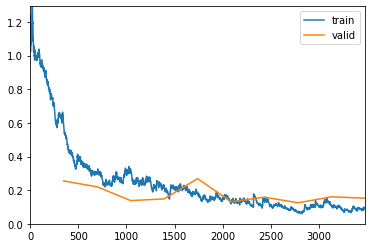

In [102]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,precision,recall,auroc,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


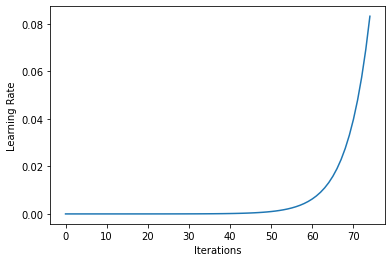

In [103]:
learn.lr_find()
learn.recorder.plot_lr()

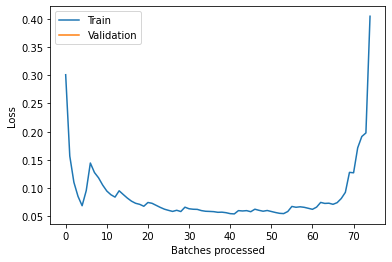

In [104]:
learn.recorder.plot_losses()

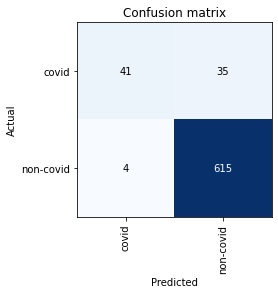

In [105]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(title='Confusion matrix')

In [106]:
learn.save('covidxray classifier')

In [127]:
img = open_image('/content/covid_image_data/test/Image_1.jpg')
pred = learn.predict(img)
pred = str(pred[0])


In [128]:
pred

'non-covid'

In [109]:
testing_dataset = pd.read_csv('/content/covid_image_data/Testing_set_covid.csv')
testing_dataset.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [130]:
testing_pred = []
for i in testing_dataset.filename:
  img = open_image('/content/covid_image_data/test/'+str(i))
  pred = learn.predict(img)
  testing_pred.append(str(pred[0]))

In [132]:
prediction_dataframe = pd.DataFrame(testing_pred)

In [140]:
prediction_dataframe.to_csv('prediction_dataframe.csv')

In [137]:
prediction_dataframe

,0
0,non-covid
1,non-covid
2,non-covid
3,non-covid
4,covid
...,...
865,covid
866,non-covid
867,non-covid
868,non-covid


In [141]:
testing = pd.read_csv('testing_prediction.csv')

In [142]:
testing.head()

,filename,prediction
0,Image_1.jpg,non-covid
1,Image_2.jpg,non-covid
2,Image_3.jpg,non-covid
3,Image_4.jpg,non-covid
4,Image_5.jpg,covid
